In [11]:
import numpy as np
import copy
from tqdm import tqdm_notebook as tqdm, tnrange as trange
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
def softmax(w):
    return np.exp(w) / np.sum(np.exp(w))

In [36]:
def get_first_reward(theta, phi):
    '''Retrieve the reward of the first player
    Input: theta, phi - logits characterizing player policies
    '''
    p = softmax(theta)
    q = softmax(phi)
    # analytical expectation
    # paper beats rock, scissors beat paper, rock beats scissors
    exp = p[0]*q[1] - p[1]*q[0] + \
          p[1]*q[2] - p[2]*q[1] + \
          p[2]*q[0] - p[0]*q[2]
    return exp

def numerical_grad(theta, phi):
    '''Gradient of the first reward wrt the first set of parameters
    '''
    epsilon = 1e-9
    loss = get_first_reward(theta, phi)
    # first-order gradient approximation
    theta_grad = np.zeros([3], dtype=np.float)
    for i in range(3):
        theta_shifted_up = copy.deepcopy(theta)
        theta_shifted_up[i] += 0.5 * epsilon
        
        theta_shifted_down = copy.deepcopy(theta)
        theta_shifted_down[i] -= 0.5 * epsilon
        theta_grad[i] = (get_first_reward(theta_shifted_up, phi) -
                         get_first_reward(theta_shifted_down, phi)) / epsilon
    return theta_grad

def get_grads(theta, phi):
    theta_grad = numerical_grad(theta, phi)
    phi_grad = numerical_grad(phi, theta)
    return theta_grad, phi_grad

# Optimize the first policy

In [39]:
theta = np.asarray([1, 0, 0], dtype=float)
phi = np.asarray([0, 0, 1], dtype=float)
losses = []
thetas = []
iters = 10000
for i in trange(iters):
    theta_grad, phi_grad = get_grads(theta, phi)
    theta = theta + theta_grad * 0.1
    thetas.append(theta[0])
    losses.append(get_first_loss(theta, phi))

0.36349418565


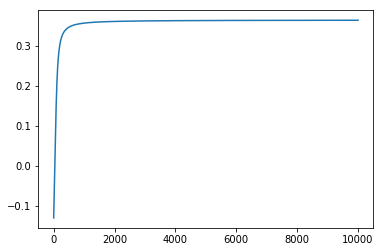

In [40]:
plt.plot(losses)
print(losses[-1])

Maximizes reward of the first player. Second one sleeps.

# Simultaneous gradient descent

In [106]:
theta = np.asarray([1, 0, 0], dtype=float)
phi = np.asarray([0, 0, 1], dtype=float)
losses = []
thetas = []
theta_grads = []
phi_grads = []
iters = 10000
for i in range(iters):
    theta_grad, phi_grad = get_grads(theta, phi)
    theta = theta + theta_grad * 0.1
    phi = phi + phi_grad * 0.1
    thetas.append(theta)
    theta_grads.append(theta_grad.tolist())
    phi_grads.append(phi_grad.tolist())
    losses.append(get_first_loss(theta, phi))

Text(0.5,0,'Iteration')

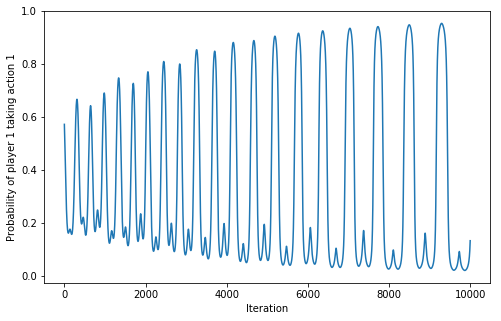

In [86]:
softmaxed = np.array([softmax(theta)[0] for theta in thetas])
plt.figure(figsize=(8, 5))
plt.plot(softmaxed)
plt.ylabel('Probability of player 1 taking action 1')
plt.xlabel('Iteration')

Text(0.5,0,'Iteration')

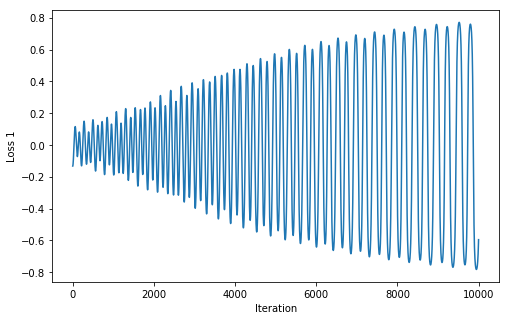

In [87]:
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.ylabel('Loss 1')
plt.xlabel('Iteration')

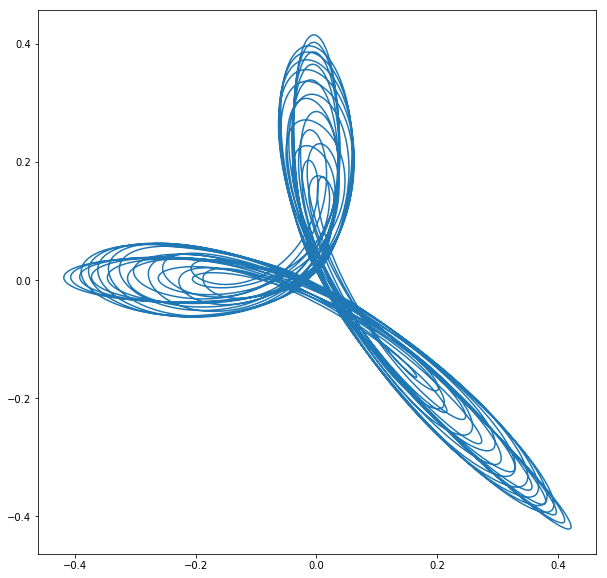

In [112]:
i = 2
x = list(zip(*theta_grads))[i]
y = list(zip(*theta_grads))[1]
# y = list(zip(*phi_grads))[i]

# x = [np.linalg.norm(grad) for grad in theta_grads]
# y = [np.linalg.norm(grad) for grad in phi_grads]

plt.figure(figsize=(10, 10))
plt.plot(x, y)